# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
pasta = Path.cwd().parent
pasta_datasets = Path(pasta/'Datasets\\analise-de-obesidade-e-pib-per-capita')

## Perguntas - Obesity among adults by country, 1975-2016

In [3]:
df_obesity = pd.read_csv(pasta_datasets/"obesity_cleaned.csv")

In [4]:
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [5]:
df_obesity['Obesity (%)'].value_counts()

Obesity (%)
No data             504
0.4 [0.1-1.0]        55
0.6 [0.2-1.3]        47
0.3 [0.1-0.7]        46
0.3 [0.1-0.8]        46
                   ... 
18.5 [14.1-23.7]      1
11.2 [8.8-14.0]       1
19.0 [14.5-24.1]      1
11.9 [9.4-14.7]       1
4.7 [2.5-8.0]         1
Name: count, Length: 16375, dtype: int64

In [6]:
df_obesity.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [7]:
del df_obesity["Unnamed: 0"]

In [8]:
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(lambda x: x.split()[0])

In [9]:
df_obesity["Obesity"].value_counts()

Obesity
No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
56.8      1
62.4      1
60.0      1
62.6      1
60.3      1
Name: count, Length: 602, dtype: int64

In [10]:
df_obesity

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [11]:
df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan

In [12]:
df_obesity.dropna(inplace=True)

In [13]:
df_obesity["Obesity"].value_counts()

Obesity
0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
61.9      1
56.8      1
62.1      1
42.7      1
46.5      1
Name: count, Length: 601, dtype: int64

In [14]:
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
# df_obesity["Obesity"] = df_obesity["Obesity"].astype(float)

df_obesity["Year"] = df_obesity["Year"].apply(lambda x: int(x))
df_obesity.set_index("Year", inplace=True)

In [15]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [16]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24066 entries, 1975 to 2016
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Obesity (%)  24066 non-null  object 
 2   Sex          24066 non-null  object 
 3   Obesity      24066 non-null  float64
dtypes: float64(1), object(3)
memory usage: 940.1+ KB


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [18]:
df_obesity[df_obesity.index == 2015]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Afghanistan,5.2 [3.3-7.7],Both sexes,5.2
2015,Afghanistan,3.0 [1.3-6.0],Male,3.0
2015,Afghanistan,7.3 [4.1-11.8],Female,7.3
2015,Albania,21.1 [16.6-26.0],Both sexes,21.1
2015,Albania,20.9 [14.4-28.1],Male,20.9
...,...,...,...,...
2015,Zambia,3.4 [1.6-6.1],Male,3.4
2015,Zambia,12.0 [8.2-16.4],Female,12.0
2015,Zimbabwe,15.2 [11.9-18.8],Both sexes,15.2


In [23]:
df_obesity[df_obesity.index == 2015].groupby("Sex").mean(numeric_only=True)

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [24]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [25]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [26]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [27]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [28]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [29]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [30]:
df_brasil = df_obesity[df_obesity["Country"] == "Brazil"]

<Axes: xlabel='Year'>

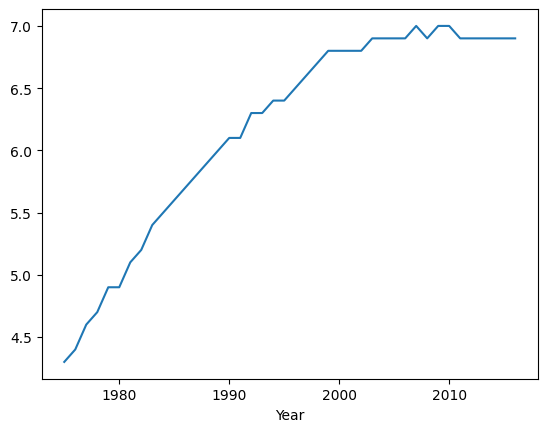

In [31]:
(df_brasil[df_brasil["Sex"] == "Female"]["Obesity"] - df_brasil[df_brasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [32]:
all_countries = df_obesity["Country"].value_counts()
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]
df_both = df_both.groupby("Year")["Obesity"].mean()

In [ ]:
df_both.plot()

## Perguntas - GDP Per Person (1901-2011)

In [ ]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

In [ ]:
df_gdp.columns

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [ ]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [ ]:
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))
del df_gdp[" GDP_pp "]

In [ ]:
df_gdp.head(3)

- Você conseguiria informar o primeiro valor registrado de cada país?

In [ ]:
df_gdp.groupby("Country").min()["Year"]

In [ ]:
df_gdp.groupby("Country").min()["Year"].isna().sum()

In [ ]:
df_gdp.groupby("Country").min()["Year"].value_counts()

In [ ]:
df_gdp.groupby("Country").min()["Year"][df_gdp.groupby("Country").min()["Year"] == 1991]

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [ ]:
df_gdp[df_gdp["Year"] < 2000]["Year"].max()

In [ ]:
df_gdp_start = df_gdp[(df_gdp["Year"] == 1901)]
df_gdp_end = df_gdp[(df_gdp["Year"] == 1996)]

In [ ]:
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() - 1) * 100).sort_values(ascending=False)

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [ ]:
df_gdp.head()

In [ ]:
arr_years = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_years, columns=["Year"])
df_all_years.index = df_all_years["Year"]

df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_years_off = df_years_off[df_years_off].index

In [ ]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [ ]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [ ]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    # print(idx, row)
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]
    
    for new_year in year_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        df_new_data["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [ ]:
df_gdp.iloc[100:].head(10)

In [ ]:
df_gdp = pd.concat([df_gdp, df_new_data]).sort_values(["Country", "Year"])
df_gdp["kind"].fillna("real", inplace=True)
df_gdp.index = df_gdp["Year"]

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red")

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [ ]:
df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True).head(5)

In [ ]:
df_gdp["Year"] = df_gdp["Year"].astype(int)
df_gdp["gdp_pp"] = df_gdp["gdp_pp"].astype(float)

In [ ]:
import plotly.express as px

df = px.data.gapminder()
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())}

df_gdp["iso_alpha"] = df_gdp["Country"].map(dict_iso_alpha)
df_gdp["iso_num"] = df_gdp["Country"].map(dict_num)

fig = px.choropleth(df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="gdp_pp", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [ ]:
df_obesity["country-year"] = df_obesity["Country"] + "-" + df_obesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("country-year").to_dict()["Obesity"]

In [ ]:
df_gdp["country-year"] = df_gdp["Country"] + "-" + df_gdp["Year"].apply(lambda x: str(x)).values
df_gdp["Obesity"] = df_gdp["country-year"].map(dict_obesity_year)

In [ ]:
# df_gdp.dropna(inplace=True)

In [ ]:
df_gdp_clean = df_gdp.dropna()

In [ ]:
countries = df_gdp_clean["Country"].unique()

In [ ]:
corr_list = []
for country in countries:
    corr_list += [df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity", "gdp_pp"]].corr().iloc[0, 1]]

df_corr = pd.Series(corr_list, index=countries)

In [ ]:
df_corr.mean()

In [ ]:
df_corr.std()

In [ ]:
df_corr.sort_values().plot()

In [ ]:
country = "Australia"
fig, ax = plt.subplots()
df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity"]].plot(ax=ax)
ax2 = ax.twinx()
df_gdp_clean[df_gdp_clean["Country"] == country][["gdp_pp"]].plot(ax=ax2, color="red")

In [ ]:
df_gdp_clean

In [ ]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[["Obesity", "gdp_pp"]].mean().corr().iloc[0, 1]